In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression

/content/drive/MyDrive/AI_VIETNAM/AIO2023/ML/Non-Linear-Regression


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#1.Load Data

In [4]:
df = pd.read_csv('./data/Fish.csv')
df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
VerticalLen,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
DiagonalLen,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
CrossLen,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<ipython-input-9-2c2b0a38db0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

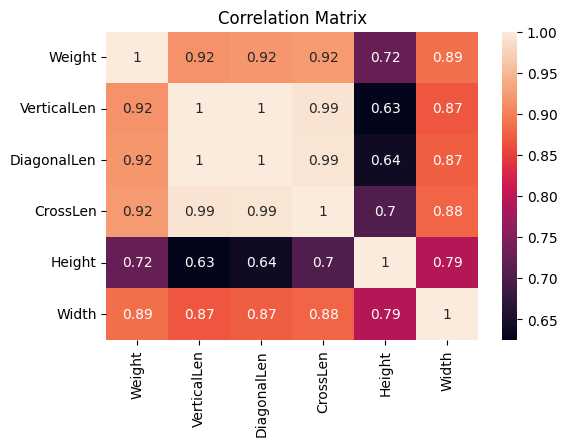

In [9]:
plt.rcParams["figure.figsize"] = (6,4)
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

**One hot encoding**

In [ ]:
encode_species = pd.get_dummies(df.Species)
encode_species.head(5)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


**Label Encoding**

In [ ]:
df["Species"] = df["Species"].astype('category')
label_ecnoding_species = df["Species"].cat.codes
label_ecnoding_species

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Length: 159, dtype: int8

In [ ]:
new_df = pd.concat([df, encode_species], axis='columns')
new_df

,Species,Weight,VerticalLen,DiagonalLen,CrossLen,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [ ]:
X = new_df[[
    'VerticalLen', 'DiagonalLen', 'CrossLen', 'Height', 'Width',
    'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'
]]
y = new_df['Weight']

In [ ]:
X = X.values
y = y.values

In [ ]:
X_data = np.hstack((np.ones((X.shape[0], 1)), X))
X_data

array([[ 1. , 23.2, 25.4, ...,  0. ,  0. ,  0. ],
       [ 1. , 24. , 26.3, ...,  0. ,  0. ,  0. ],
       [ 1. , 23.9, 26.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 12.1, 13. , ...,  0. ,  1. ,  0. ],
       [ 1. , 13.2, 14.3, ...,  0. ,  1. ,  0. ],
       [ 1. , 13.8, 15. , ...,  0. ,  1. ,  0. ]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 13)
X_test shape:  (32, 13)
y_train shape:  (127,)
y_train shape:  (32,)


#2.Linear Regression

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [ ]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.00001, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [ ]:
linear_model = LinearRegression(X_train, y_train, learning_rate=0.00001, num_epochs=100000)
linear_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 95000 - Loss: 30243.401993059502
Epoch: 95001 - Loss: 30243.28925431281
Epoch: 95002 - Loss: 30243.176516451076
Epoch: 95003 - Loss: 30243.0637794743
Epoch: 95004 - Loss: 30242.951043382483
Epoch: 95005 - Loss: 30242.838308175622
Epoch: 95006 - Loss: 30242.725573853702
Epoch: 95007 - Loss: 30242.612840416718
Epoch: 95008 - Loss: 30242.500107864664
Epoch: 95009 - Loss: 30242.387376197516
Epoch: 95010 - Loss: 30242.274645415266
Epoch: 95011 - Loss: 30242.161915517936
Epoch: 95012 - Loss: 30242.04918650549
Epoch: 95013 - Loss: 30241.936458377946
Epoch: 95014 - Loss: 30241.823731135275
Epoch: 95015 - Loss: 30241.711004777477
Epoch: 95016 - Loss: 30241.598279304544
Epoch: 95017 - Loss: 30241.485554716466
Epoch: 95018 - Loss: 30241.372831013236
Epoch: 95019 - Loss: 30241.260108194845
Epoch: 95020 - Loss: 30241.147386261284
Epoch: 95021 - Loss: 30241.03466521256
Epoch: 95022 - Loss: 30240.92194504864
Epoch: 95023 - Loss: 30240.80922576

{'loss': 36912.135264524004,
 'weight': array([-100.76928384,   34.40499742,   12.22724837,  -27.70907688,
          13.82500937,    8.73127718,   16.04797606,  -23.99177386,
         -32.74265084,    5.23985062,  -45.75029896,  -18.55068281,
           1.87815255])}

In [ ]:
preds = linear_model.predict(X_train)
r2score(preds, y_train)

0.758471972326308

In [ ]:
preds = linear_model.predict(X_test)
r2score(preds, y_test)

0.7722731518423978

#3.Polynomial Regression

##3.1.Simple Approach
**Form**
$(a+b)^2 => a^2 + b^2 + a + b + 1$

In [ ]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

In [ ]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[ 23.2 , 538.24,  25.4 , ...,   0.  ,   0.  ,   0.  ],
       [ 24.  , 576.  ,  26.3 , ...,   0.  ,   0.  ,   0.  ],
       [ 23.9 , 571.21,  26.5 , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 12.1 , 146.41,  13.  , ...,   1.  ,   0.  ,   0.  ],
       [ 13.2 , 174.24,  14.3 , ...,   1.  ,   0.  ,   0.  ],
       [ 13.8 , 190.44,  15.  , ...,   1.  ,   0.  ,   0.  ]])

In [ ]:
X_poly.shape

(159, 24)

In [ ]:
X_data = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_data

array([[  1.  ,  23.2 , 538.24, ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  24.  , 576.  , ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  23.9 , 571.21, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  1.  ,  12.1 , 146.41, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.2 , 174.24, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.8 , 190.44, ...,   1.  ,   0.  ,   0.  ]])

In [ ]:
X_data.shape, y.shape

((159, 25), (159,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 25)
X_test shape:  (32, 25)
y_train shape:  (127,)
y_train shape:  (32,)


In [ ]:
poly_model = LinearRegression(X_train, y_train, learning_rate=0.0000001, num_epochs=100000)
poly_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 95000 - Loss: 3696.89196917447
Epoch: 95001 - Loss: 3696.8849503818437
Epoch: 95002 - Loss: 3696.877931683238
Epoch: 95003 - Loss: 3696.870913078663
Epoch: 95004 - Loss: 3696.863894568109
Epoch: 95005 - Loss: 3696.8568761515885
Epoch: 95006 - Loss: 3696.849857829086
Epoch: 95007 - Loss: 3696.842839600598
Epoch: 95008 - Loss: 3696.8358214661366
Epoch: 95009 - Loss: 3696.828803425691
Epoch: 95010 - Loss: 3696.821785479263
Epoch: 95011 - Loss: 3696.814767626845
Epoch: 95012 - Loss: 3696.807749868443
Epoch: 95013 - Loss: 3696.8007322040407
Epoch: 95014 - Loss: 3696.79371463366
Epoch: 95015 - Loss: 3696.7866971572785
Epoch: 95016 - Loss: 3696.7796797749065
Epoch: 95017 - Loss: 3696.7726624865422
Epoch: 95018 - Loss: 3696.765645292184
Epoch: 95019 - Loss: 3696.7586281918243
Epoch: 95020 - Loss: 3696.751611185456
Epoch: 95021 - Loss: 3696.74459427309
Epoch: 95022 - Loss: 3696.737577454723
Epoch: 95023 - Loss: 3696.7305607303456
Epoch: 

{'loss': 4736.202582684754,
 'weight': array([ 0.69793487, -2.45055693, -0.0229068 , -2.13680359,  1.09500465,
        -4.58885562, -0.55209015, -0.39281029,  1.81291703,  1.26065697,
         4.47494252,  0.70323332,  1.08654217, -0.20255032, -0.34558911,
        -0.15845718,  0.5044451 ,  1.02372281, -0.19755668,  0.39888555,
         0.41673566,  0.73318175, -0.55579815, -0.82636553, -0.62040198])}

In [ ]:
preds = poly_model.predict(X_train)
r2score(preds, y_train)

0.9702026063287604

In [ ]:
preds = poly_model.predict(X_test)
r2score(preds, y_test)

0.9722582961378822

##3.2.Advanced Approach
**Form**
$(a+b)^2 => a^2 + b^2 + ab + a + b + 1$

In [ ]:
class PolynomialFeaturesForDegree():
    '''
    Calculates the polynomial features of a dataset for a given degree.

    Args:
        degree (int): The degree of the polynomial features to be calculated.

    Attributes:
        degree (int): The degree of the polynomial features to be calculated.
        options (list): A list containing n-tuples specifying the exponent of each
                        feature in the dataset for each term in the polynomial
                        expansion.
    '''

    def __init__(self, degree):
        self.degree = degree
        self.options = []


    def display_terms(self):
        '''
        If a training instance has three features, i.e. [a,b,c], and (0,0,2) is
        displayed this indicates that a^0 * b^0 * c^2 is a term in the polynomial
        expansion of the dataset.
        '''

        print('Exponents of features at each index:')
        for i in sorted(self.options):
            print(i)


    def get_terms(self, features):
        m = features.shape[1]

        # Determines the number of possible combinations with a summation of m
        # variables raised to power n.
        num = (self.degree+1)**m
        ls = [0] * m

        # Calculate all possible combinations of the features in the dataset.
        for x in range(1,num):
            for idx in range(len(ls)-1, -1, -1):
                if ls[idx] == 0:
                    ls[idx] += 1
                    break
                elif ls[idx] % self.degree == 0:
                    ls[idx] = 0
                    if ls[idx - 1] != self.degree:
                        ls[idx-1] += 1
                        break
                    else:
                        deficit = -1
                        stop = False
                        while not stop and (idx + deficit) > -1:
                            if ls[idx + deficit] != self.degree:
                                ls[idx + deficit] += 1
                                stop = True
                            else:
                                ls[idx + deficit] = 0
                                deficit -= 1
                        break
                elif idx == (len(ls) - 1):
                    ls[idx] += 1
                    break

            # This is the Kronecker Delta Function used to eliminate terms that
            # do not form part of the polynomial expansion.
            if sum(ls) == self.degree:
                self.options.append(tuple(ls))


    def get_polynomial_features(self, features):
        # Calculate the terms in the polynomial expansion.
        self.get_terms(features)

        poly_features  = np.empty((len(features),0))
        feature_ls = []

        # Add vector of ones for degree zero.
        for i in range(features.shape[1]):
            feature_ls.append(features[:,i].reshape(-1,1))

        # Add the polynomial features to the dataset.
        for i,tup in enumerate(self.options):
            vector = np.full((len(features), 1), 1)

            # Calculate polynomial feature.
            vector = np.float_(vector)
            for feature_idx, exp in enumerate(tup):
                vector *= feature_ls[feature_idx] ** exp

            # Append polynomial feature to the dataset.
            poly_features = np.c_[poly_features,vector]

        return poly_features



class PolynomialFeatures():
    '''
    Calculates the polynomial features for all degrees up to and including the
    specified degree.

    Args:
        degree (int): The highest degree polynomial features to be calculated.

    Attributes:
        degree (int): The highest degree polynomial features to be calculated.
        transformers (list): A list containing one transformer for each degree
                            for which polynomial features are to be calculated.
    '''

    def __init__(self, degree):
        self.degree = degree

    def fit(self):
        self.transformers = []
        # Add one transformer for each degree.
        for i in range(1, self.degree + 1):
            self.transformers.append(PolynomialFeaturesForDegree(i))

    def transform(self,dataset):
        try:
            temp = np.ones((len(dataset),1))
            # Calculate and add polynomial features for each degree to the dataset.
            for t in self.transformers:
                features_for_deg = t.get_polynomial_features(dataset)
                temp = np.c_[temp, features_for_deg]
            return temp
        except AttributeError:
            print('Transformer not fitted, call \'fit\' with appropriate arguments before using transformer.')

In [ ]:
poly_feature = PolynomialFeatures(2)
poly_feature.fit()
X_data = poly_feature.transform(X)

In [ ]:
# X_data has bias
X_data

array([[  1.  ,   0.  ,   0.  , ..., 696.  , 589.28, 538.24],
       [  1.  ,   0.  ,   0.  , ..., 748.8 , 631.2 , 576.  ],
       [  1.  ,   0.  ,   0.  , ..., 743.29, 633.35, 571.21],
       ...,
       [  1.  ,   0.  ,   1.  , ..., 166.98, 157.3 , 146.41],
       [  1.  ,   0.  ,   1.  , ..., 200.64, 188.76, 174.24],
       [  1.  ,   0.  ,   1.  , ..., 223.56, 207.  , 190.44]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 91)
X_test shape:  (32, 91)
y_train shape:  (127,)
y_train shape:  (32,)


In [ ]:
poly_model = LinearRegression(X_train, y_train, learning_rate=0.0000001, num_epochs=100000)
poly_model.fit()

Streaming output truncated to the last 5000 lines.
Epoch: 95000 - Loss: 2539.184154363551
Epoch: 95001 - Loss: 2539.177862648663
Epoch: 95002 - Loss: 2539.171571071988
Epoch: 95003 - Loss: 2539.165279633517
Epoch: 95004 - Loss: 2539.1589883332736
Epoch: 95005 - Loss: 2539.1526971712196
Epoch: 95006 - Loss: 2539.146406147361
Epoch: 95007 - Loss: 2539.1401152617036
Epoch: 95008 - Loss: 2539.1338245142397
Epoch: 95009 - Loss: 2539.1275339049694
Epoch: 95010 - Loss: 2539.1212434338754
Epoch: 95011 - Loss: 2539.11495310097
Epoch: 95012 - Loss: 2539.1086629062393
Epoch: 95013 - Loss: 2539.1023728496834
Epoch: 95014 - Loss: 2539.096082931287
Epoch: 95015 - Loss: 2539.089793151072
Epoch: 95016 - Loss: 2539.0835035090126
Epoch: 95017 - Loss: 2539.0772140051104
Epoch: 95018 - Loss: 2539.070924639364
Epoch: 95019 - Loss: 2539.0646354117753
Epoch: 95020 - Loss: 2539.058346322324
Epoch: 95021 - Loss: 2539.052057371021
Epoch: 95022 - Loss: 2539.0457685578585
Epoch: 95023 - Loss: 2539.0394798828415
E

{'loss': 3823.997479044584,
 'weight': array([ 1.42975352, -1.1716337 , -0.7291502 ,  1.00671762,  1.52804378,
        -0.02513517, -0.08202872, -0.84996703,  0.24026983,  0.28574602,
        -3.38744612, -4.74770418, -2.88841775, -1.24008535, -0.98501366,
        -0.46780367,  0.6091811 , -0.00997997, -0.82977255,  1.53439727,
         0.15918969, -0.64312891, -0.83580586,  1.50798696,  0.75292843,
        -0.55817339,  0.60938098, -2.74035649, -2.15785837,  0.7049515 ,
        -1.98441915, -0.2229927 , -0.49500654,  0.76726614,  0.00864746,
         1.80338157, -0.82519675,  0.75012818, -1.02186204, -0.31675285,
         2.07446176, -0.46350148, -1.23213557,  0.22531004, -1.03703025,
         0.89056168,  0.15887218, -0.41220549,  0.6575032 ,  0.45481499,
        -1.10104281,  0.46692266, -0.63529861,  0.29729692, -0.07448199,
         0.51285669, -1.64532461,  2.22586415,  0.02065858,  1.40333506,
        -1.05790002, -0.55575384,  1.14103722, -0.07060322,  0.22614596,
         1.46

In [ ]:
preds = poly_model.predict(X_train)
r2score(preds, y_train)

0.9795866421371725

In [ ]:
preds = poly_model.predict(X_test)
r2score(preds, y_test)

0.9825460227311297